In [51]:
library(readxl)
heart <-read_excel("/kaggle/input/heart-diseases/heart.data.xlsx")
head(heart,5)

SN,biking,smoking,heart.disease
<dbl>,<dbl>,<dbl>,<dbl>
1,30.801246,10.896608,11.769423
2,65.129215,2.219563,2.854081
3,1.959665,17.588331,17.177803
4,44.800196,2.802559,6.816647
5,69.428454,15.974505,4.062224


## Discriptive Analysis

In [52]:
library(tidyverse)
HEART <-select(heart, biking, smoking, heart.disease)
summary(HEART)


     biking          smoking        heart.disease    
 Min.   : 1.119   Min.   : 0.5259   Min.   : 0.5519  
 1st Qu.:20.205   1st Qu.: 8.2798   1st Qu.: 6.5137  
 Median :35.824   Median :15.8146   Median :10.3853  
 Mean   :37.788   Mean   :15.4350   Mean   :10.1745  
 3rd Qu.:57.853   3rd Qu.:22.5689   3rd Qu.:13.7240  
 Max.   :74.907   Max.   :29.9467   Max.   :20.4535  

The dataset under consideration includes three variables: biking, smoking, and heart disease. The summary statistics for these variables reveal several noteworthy patterns. The biking variable ranges from a minimum of 1.119 to a maximum of 74.907, with a mean value of 37.788 and a median of 35.824. This slight positive skew indicates that there are higher biking values that elevate the mean above the median. The interquartile range (IQR), spanning from 20.205 to 57.853, suggests considerable variability in the amount of biking among individuals.

In the case of the smoking variable, the values range from 0.5259 to 29.9467, with a mean of 15.4350 and a median of 15.8146, indicating a fairly symmetrical distribution. The IQR here, from 8.2798 to 22.5689, highlights a significant spread in smoking habits within the dataset.

For heart disease, the variable ranges from 0.5519 to 20.4535, with a mean of 10.1745 and a median of 10.3853. This close alignment of the mean and median values suggests a symmetrical distribution of heart disease values. The IQR, which extends from 6.5137 to 13.7240, indicates that there is considerable variability in heart disease prevalence among the individuals.

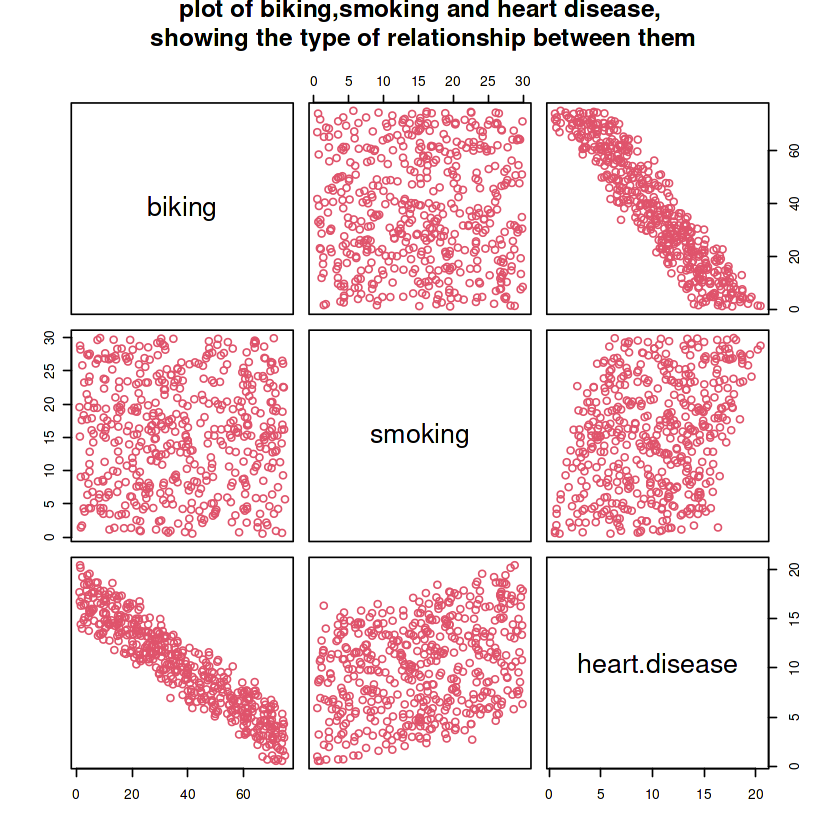

In [53]:
plot(HEART, main="plot of biking,smoking and heart disease,\n showing the type of relationship between them",
                                 col=2)

# Distribution of Analysis

## Checking for normal distribution: Hypothesis testing using shapiro test

In [54]:
shapiro.test(heart$biking)
shapiro.test(heart$smoking)
shapiro.test(heart$heart.disease)


	Shapiro-Wilk normality test

data:  heart$biking
W = 0.95094, p-value = 8.516e-12



	Shapiro-Wilk normality test

data:  heart$smoking
W = 0.96163, p-value = 4.164e-10



	Shapiro-Wilk normality test

data:  heart$heart.disease
W = 0.98047, p-value = 3.158e-06


The Shapiro-Wilk normality tests for biking, smoking, and heart disease all yield p-values significantly less than 0.05, leading to the conclusion that none of these variables follow a normal distribution. This non-normality suggests the need for non-parametric methods or data transformations in subsequent analyses.

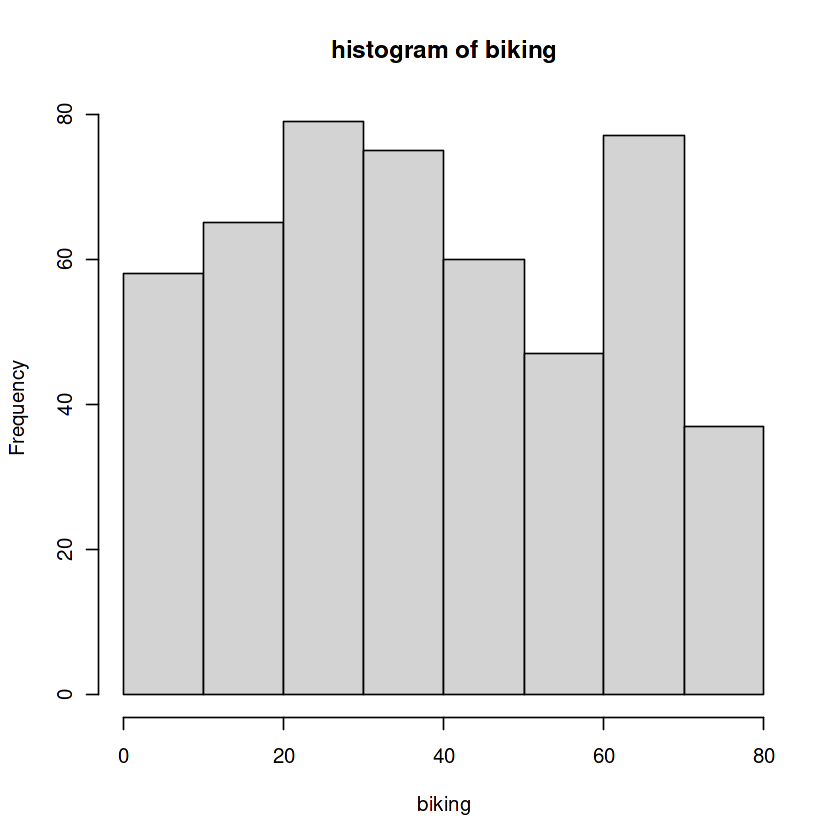

In [55]:
hist(heart$biking,main="histogram of biking",
     xlab="biking",cex=1,pch=1.2)

## Distribution of Smoking

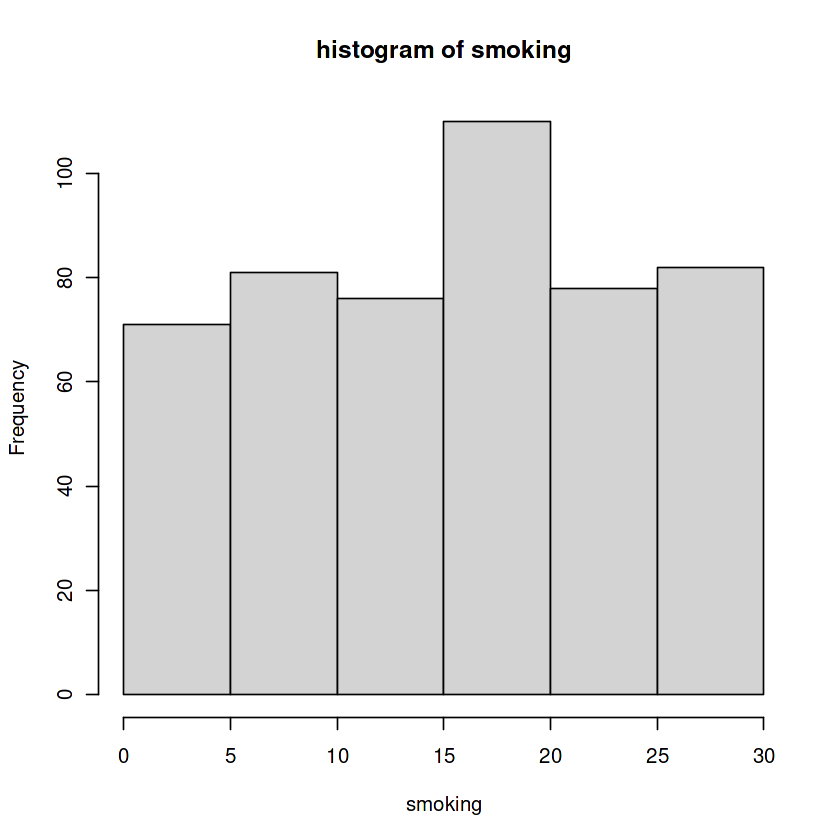

In [56]:
hist(heart$smoking,main= "histogram of smoking",
     xlab="smoking",cex =1, pch=1.2)

## Distribution of disease

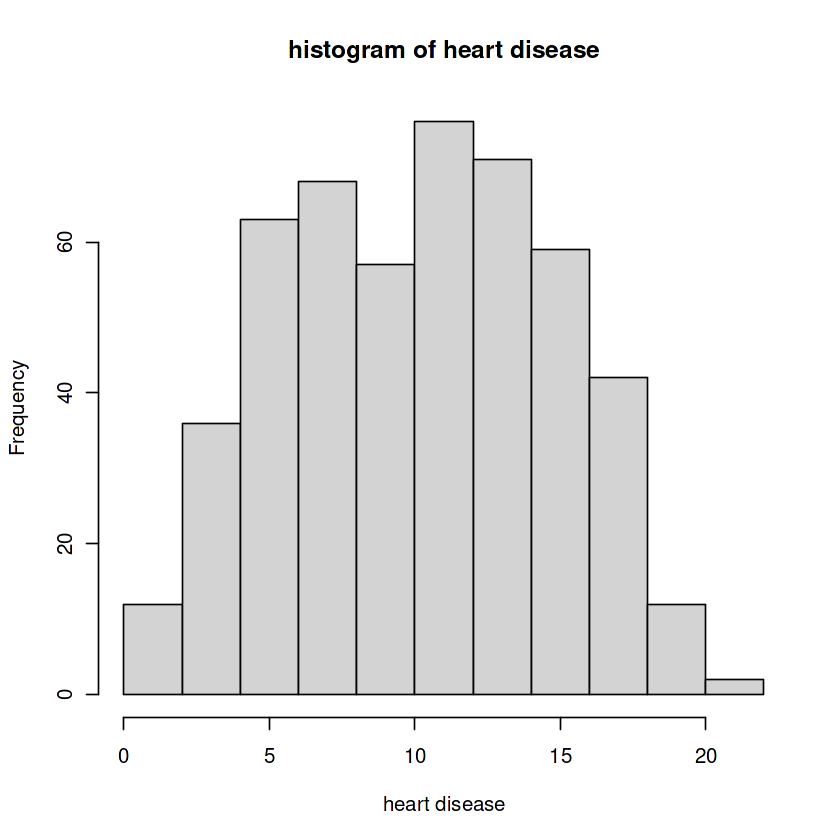

In [57]:
hist(heart$heart.disease,main="histogram of heart disease",
     xlab ="heart disease",cex=1,pch=1.2)


# Relationsgip between the variables

## Relationsgip between disease and biking

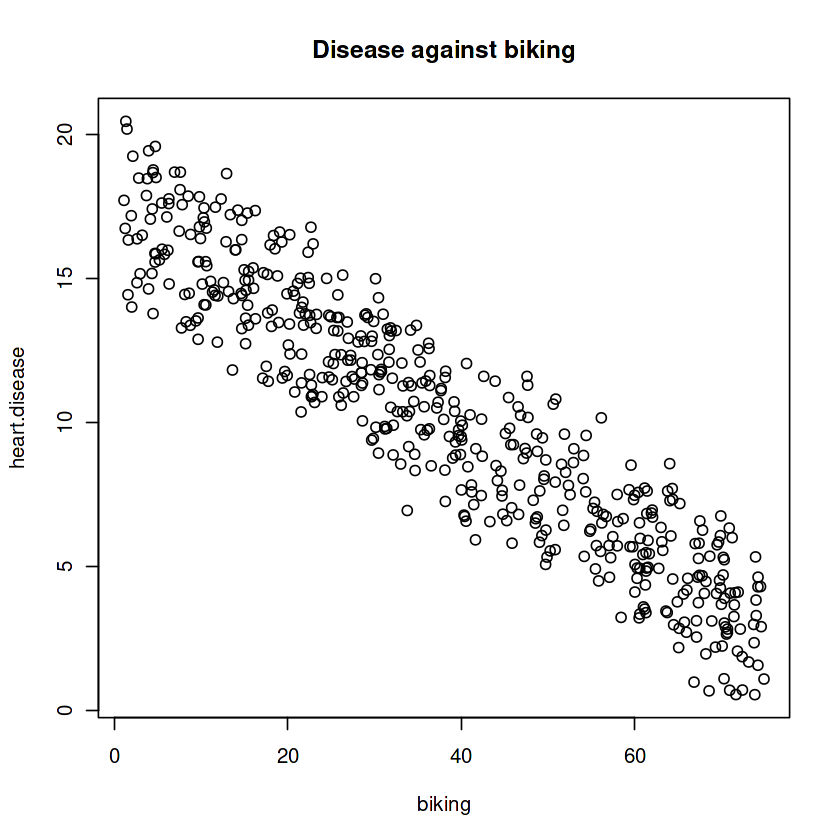

In [58]:
plot(heart.disease~biking, data=HEART, main="Disease against biking")


## Relationsgip between disease and smoking

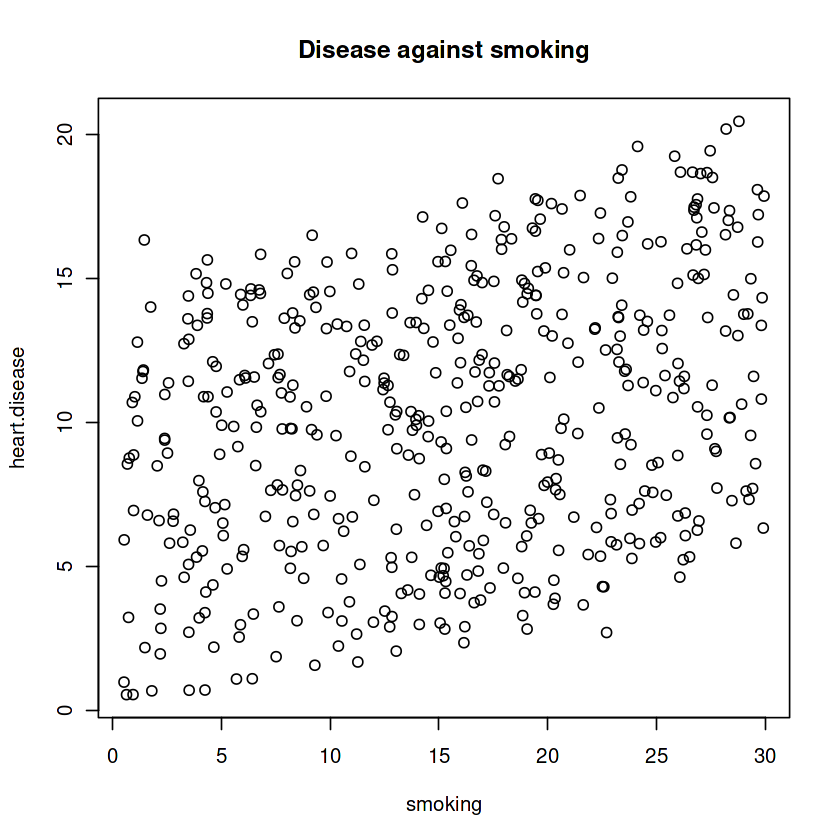

In [59]:
plot(heart.disease~smoking, data=HEART,main="Disease against smoking")

In [60]:
cor.test(HEART$heart.disease, HEART$biking)

library(broom)


	Pearson's product-moment correlation

data:  HEART$heart.disease and HEART$biking
t = -58.944, df = 496, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9455983 -0.9234959
sample estimates:
       cor 
-0.9354555 


In [61]:
cor.test(HEART$heart.disease, HEART$smoking)


	Pearson's product-moment correlation

data:  HEART$heart.disease and HEART$smoking
t = 7.2393, df = 496, p-value = 1.729e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2274422 0.3864994
sample estimates:
     cor 
0.309131 


Examining the correlations, a strong negative correlation is found between biking and heart disease, with a Pearson correlation coefficient of -0.9355 and a p-value less than 2.2e-16. This significant negative correlation implies that increased biking activity is associated with a marked decrease in heart disease. Conversely, a moderate positive correlation is observed between smoking and heart disease, with a Pearson correlation coefficient of 0.3091 and a p-value of 1.729e-12, indicating that higher levels of smoking are associated with an increase in heart disease prevalence.

In [62]:
library(caTools)
split <-sample.split(HEART, SplitRatio =0.7)
train <-subset(HEART, split ="TRUE")
test <-subset(HEART, split ="FALSE")

In [63]:
model <-lm(heart.disease~.,data=train)
summary(model)


Call:
lm(formula = heart.disease ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1789 -0.4463  0.0362  0.4422  1.9331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.984658   0.080137  186.99   <2e-16 ***
biking      -0.200133   0.001366 -146.53   <2e-16 ***
smoking      0.178334   0.003539   50.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.654 on 495 degrees of freedom
Multiple R-squared:  0.9796,	Adjusted R-squared:  0.9795 
F-statistic: 1.19e+04 on 2 and 495 DF,  p-value: < 2.2e-16


The linear regression model further elucidates these relationships. The model, which uses biking and smoking as predictors of heart disease, has an intercept of 14.9847, indicating the baseline level of heart disease when both biking and smoking are zero. The coefficient for biking is -0.2001, suggesting that each additional unit of biking reduces the heart disease score by 0.2001 units, holding smoking constant. This aligns with the strong negative correlation observed earlier. Similarly, the coefficient for smoking is 0.1783, indicating that each additional unit of smoking increases the heart disease score by 0.1783 units, holding biking constant. This finding is consistent with the moderate positive correlation noted.

The model's high R-squared value of 0.9796 indicates that approximately 97.96% of the variability in heart disease can be explained by the two predictors, biking and smoking, highlighting the model's robustness.

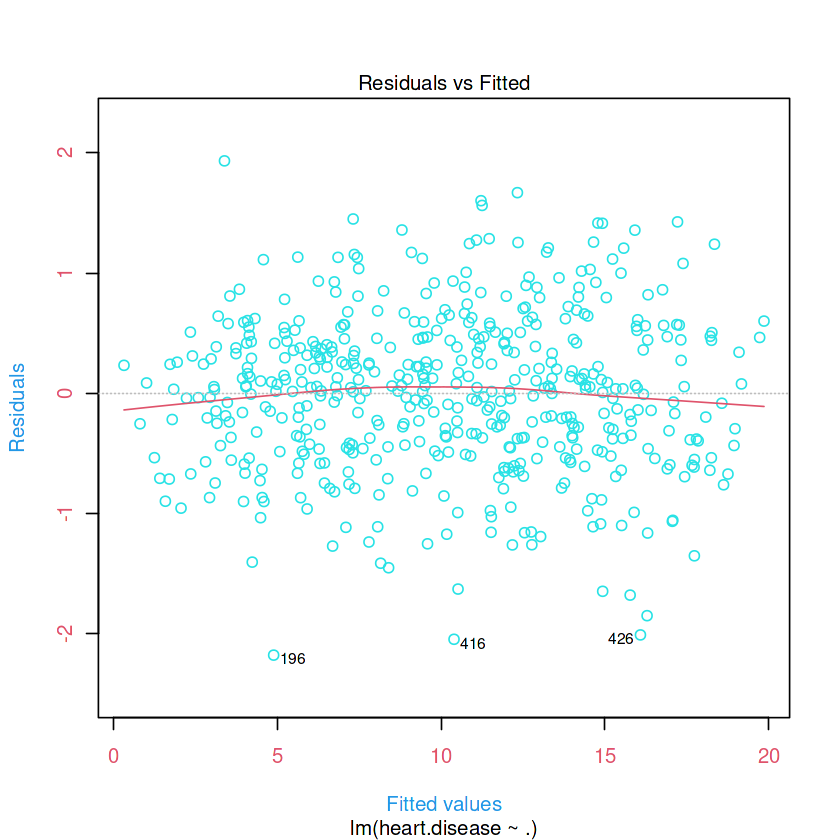

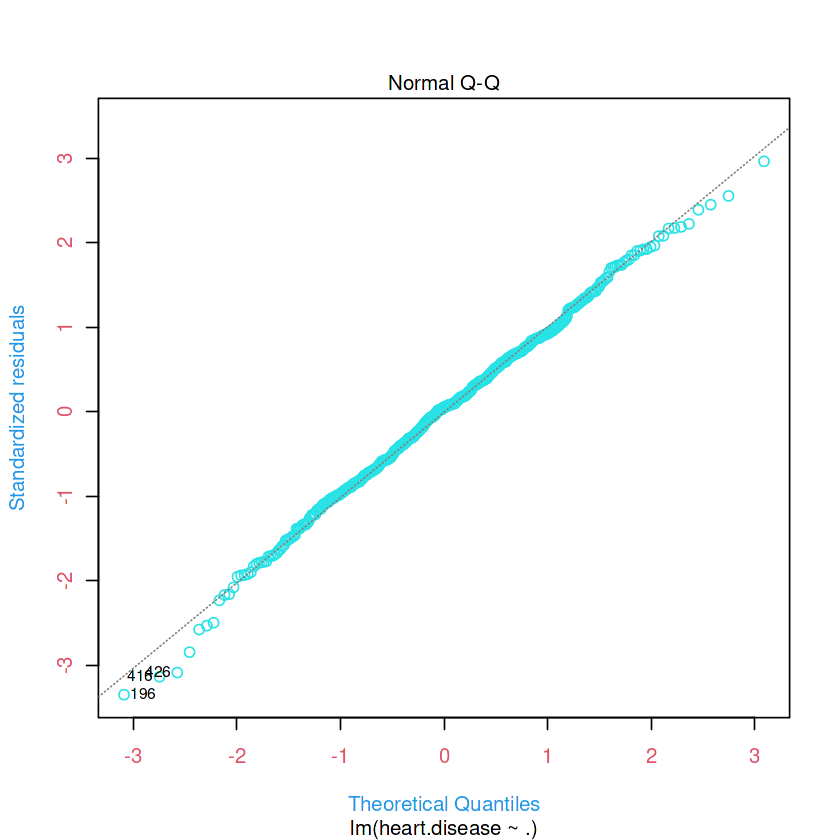

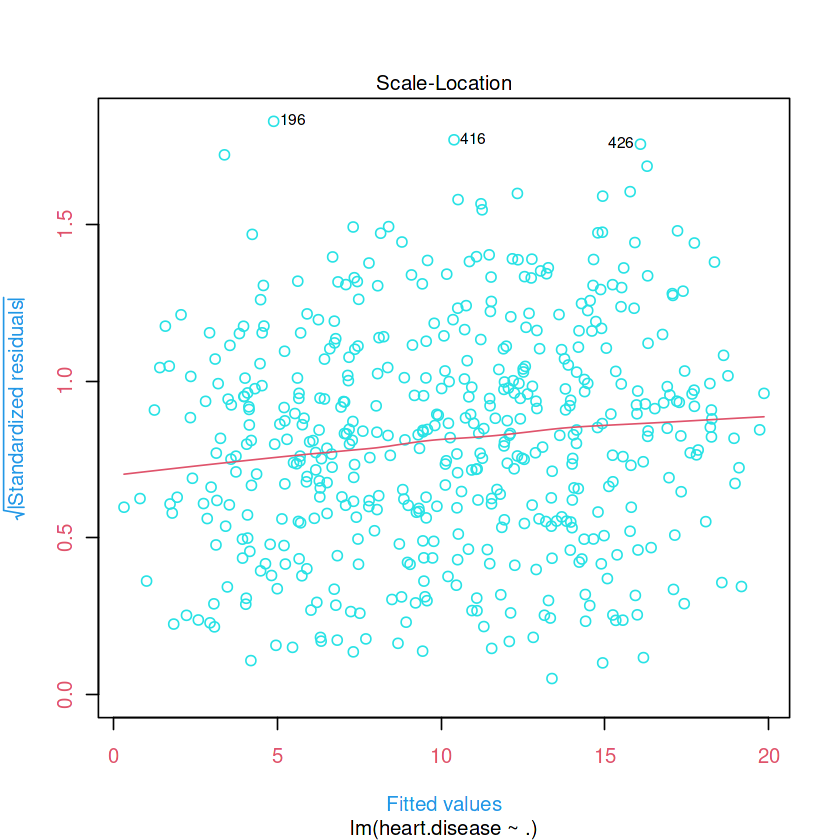

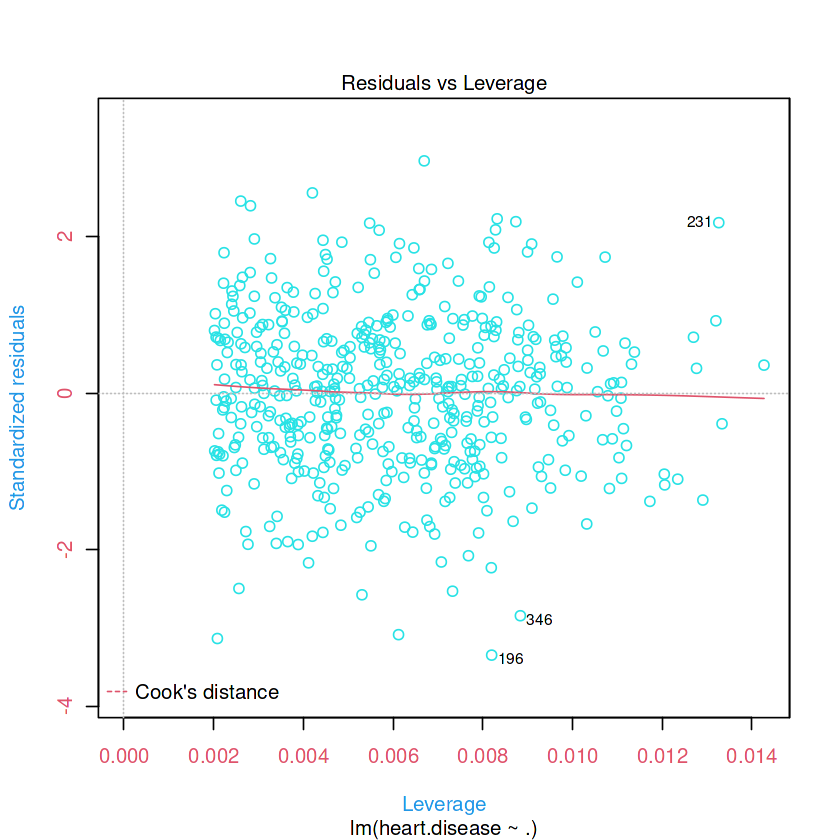

In [64]:

library(ggpubr)

plot(model,col.lab=4,col.axis=2, col=5, col.main=7)

# Plotting the model best line of fit on a graph

## Sampling a data to be used for the graph

In [65]:
model.plot <-expand.grid(biking =seq(min( HEART$biking), max(HEART$biking),
                                     length.out =30), smoking =c(min(HEART$smoking),
                                                                 mean(HEART$smoking), 
                                                                 max(HEART$smoking)))

## Making prediction

In [66]:
model.plot$predicted.y <-predict.lm(model, newdata=model.plot)
model.plot$smoking <-round(model.plot$smoking, digits =2)
model.plot$smoking<-as.factor(model.plot$smoking)

## Plotting the model

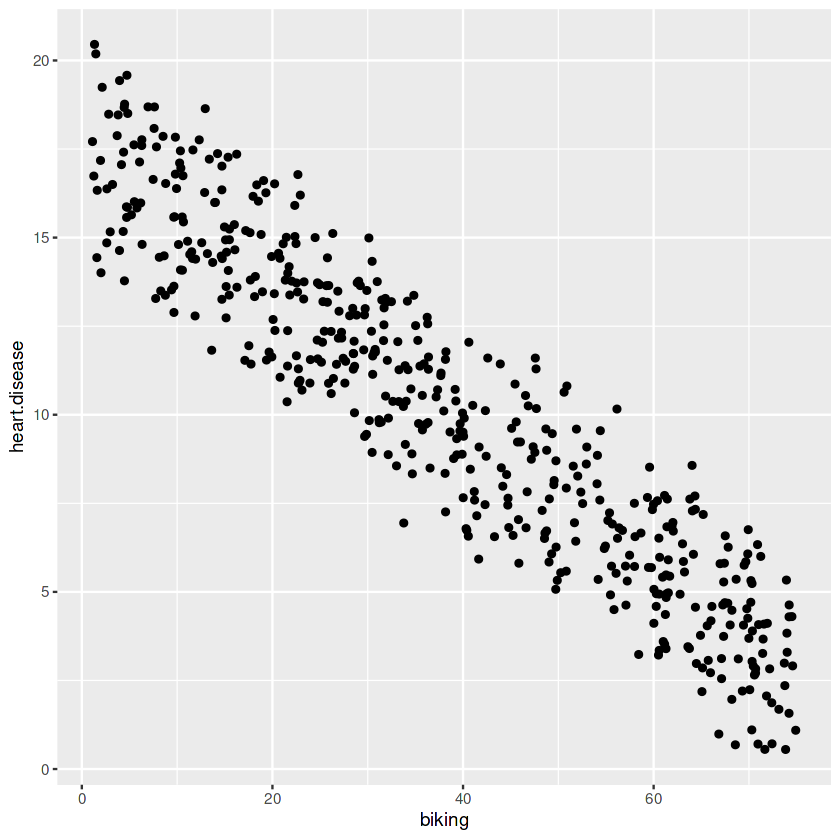

In [67]:
model1 <-ggplot(HEART, aes(x =biking,
                           y =heart.disease))+geom_point()
model1

## Adding the best line of fit to the graph

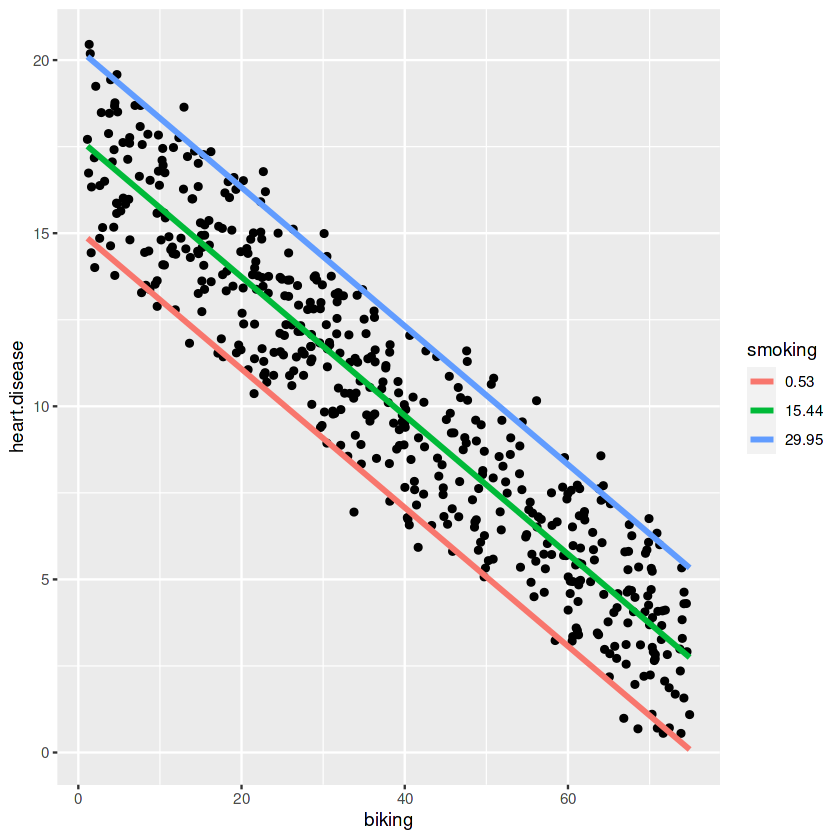

In [68]:
model1 <-model1+geom_line(data =model.plot,
                          aes(x=biking, y=predicted.y,
                              color = smoking), size=1.25)
model1

## Adding a lables and title

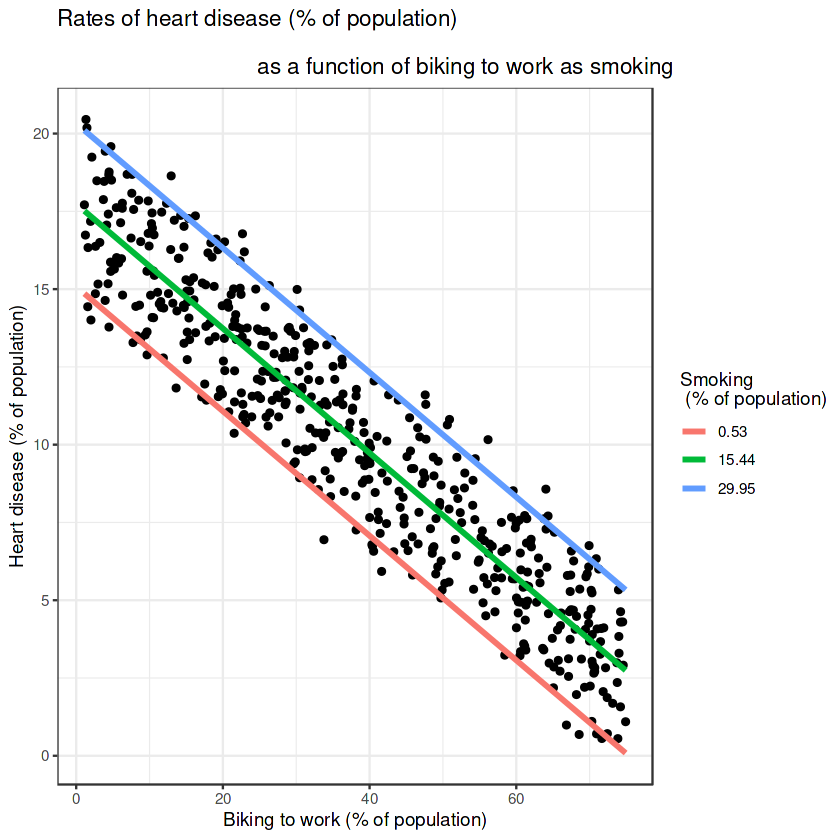

In [69]:
model1 <-model1+theme_bw()+labs(title ="Rates of heart disease (% of population) \n
                                as a function of biking to work as smoking",
                                x= "Biking to work (% of population)",
                                y = "Heart disease (% of population)", 
                                color ="Smoking \n (% of population)")
model1

## Adding the algorithm mathematical structure

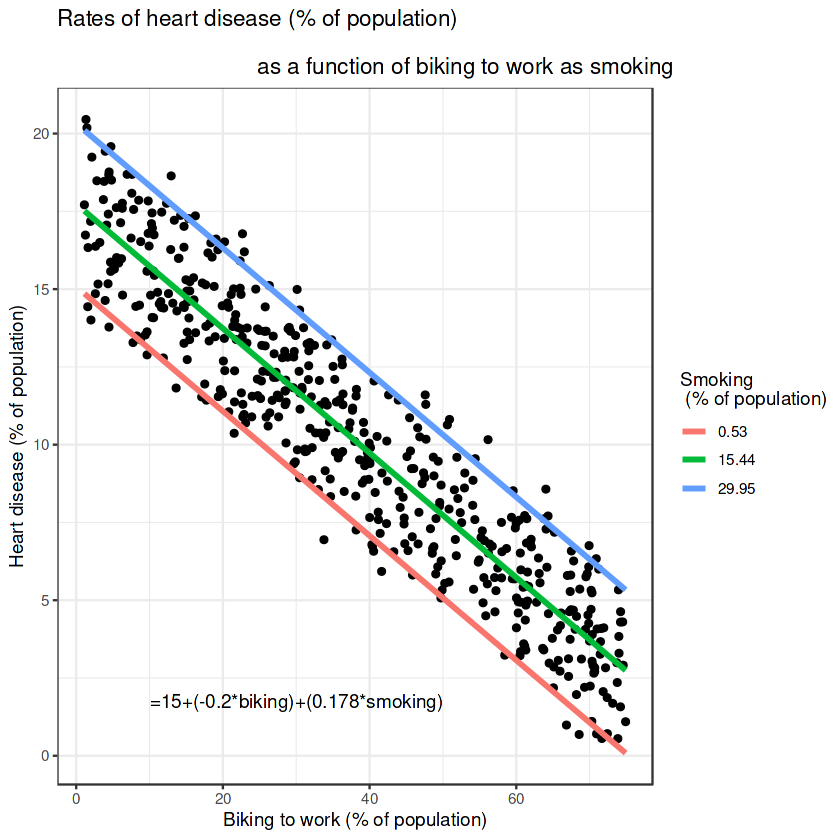

In [70]:

model1 + annotate(geom="text", x=30, y=1.75, 
                  label="=15+(-0.2*biking)+(0.178*smoking)")

# Key Findings

### The analysis reveals several key insights into the relationship between biking, smoking, and heart disease. The summary statistics highlight a wide range of values for all three variables. The normality tests indicate that none of the variables follow a normal distribution, which is important to consider for further statistical modeling.

### Correlation analysis shows a strong negative correlation between biking and heart disease, suggesting that more biking is associated with lower heart disease levels. Conversely, there is a moderate positive correlation between smoking and heart disease, indicating that higher smoking levels are associated with increased heart disease.

### The linear regression model further supports these findings. Biking has a significant negative impact on heart disease, while smoking has a significant positive impact. The high R-squared value indicates that the model explains nearly all the variability in heart disease, demonstrating the strong predictive power of biking and smoking.

### Overall, the analysis suggests that increasing biking activity and reducing smoking could be effective strategies for mitigating heart disease risk. These findings can inform public health policies and individual lifestyle choices aimed at improving cardiovascular health.